<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/linearregrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.6.0


In [ ]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt

data = pd.read_csv('ex1data1.txt', header=None, delimiter=',',error_bad_lines=False).values



--2021-11-07 11:29:25--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt.1’

ex1data1.txt.1      100%[===================>]   1.33K  --.-KB/s    in 0s      

2021-11-07 11:29:25 (42.5 MB/s) - ‘ex1data1.txt.1’ saved [1359/1359]



In [ ]:
data.shape

(97, 2)

In [ ]:
x = data[:, 0].reshape(-1, 1) #numbers show population of the city
y = data[:,1]  #numbers show profit of the food

M = len(y)  # number of training examples
print(M)

97
97


In [ ]:
print(data)

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

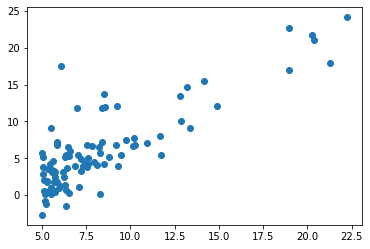

In [ ]:

plt.scatter(x, y)

In [ ]:
ones = np.ones((M, 1)) #column of 1s for theta
print(ones)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
X=np.hstack((ones,x))
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [ ]:
theta = np.zeros(2)
print(theta)
num_iters = 1500
alpha = 0.01

[0. 0.]


In [ ]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [ ]:
J = compute_cost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)

With theta = [0 ; 0]
Cost computed = 32.072733877455676


In [ ]:
J = compute_cost(X, y, [-1,2])
print('With theta = [-1 ; 2]\nCost computed =', J)

With theta = [-1 ; 2]
Cost computed = 54.24245508201238


In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    theta_0 = theta.copy()
    for i in range(0, num_iters):
        h = X.dot(theta_0)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta_0 = theta_0 - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta_0)

    return theta_0, J_history

In [ ]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [-3.63029144  1.16636235]


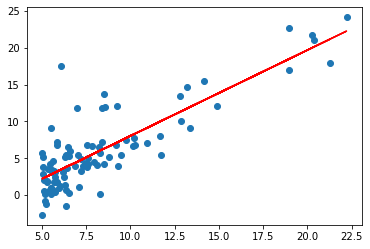

In [ ]:
plt.scatter(x, y)
plt.plot(X[:,1], X.dot(theta), color='r')